<a href="https://colab.research.google.com/github/utkarshk30/NLP-Project-Round---1/blob/main/NLP_Project_Round_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text Processing for the book Software-Engineering-9th-Edition-by-Ian-Sommerville

#### Importing Libraries

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

####  Reading book and converting it into a text variable

In [ ]:
file = open(r"book.txt",encoding='utf-8')
wordslist = file.read().splitlines() # to escape \n occurence
wordslist = [i for i in wordslist if i!='']
text = ""
text = text.join(wordslist)

In [ ]:
type(file)

_io.TextIOWrapper

In [ ]:
text[:] #all characters of the book are taken

" PART 1 Introduction to Software EngineeringMy aim in this part of the book is to provide a general introduction tosoftware engineering. I introduce important concepts such as softwareprocesses and agile methods, and describe essential software developmentactivities, from initial software specification through to system evolution.The chapters in this part have been designed to support a one-semestercourse in software engineering.   Chapter 1 is a general introduction that introduces professional software   engineering and defines some software engineering concepts. I have   also written a brief discussion of ethical issues in software engineering.    I think that it is important for software engineers to think about the   wider implications of their work. This chapter also introduces three case   studies that I use in the book, namely a system for managing records of   patients undergoing treatment for mental health problems, a control   system for a portable insulin pump and a wilder

In [ ]:
len(text)

1016564

### Preprocessing

In [ ]:
# Removing all the punctuations
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
cleantext = ""
for char in text:
    if char not in punctuations:
        cleantext = cleantext + char
        
#Converting the text into lower case         
cleantext = cleantext.lower()

In [ ]:
cleantext[:]  #after removing the punctuations

' part 1 introduction to software engineeringmy aim in this part of the book is to provide a general introduction tosoftware engineering i introduce important concepts such as softwareprocesses and agile methods and describe essential software developmentactivities from initial software specification through to system evolutionthe chapters in this part have been designed to support a onesemestercourse in software engineering   chapter 1 is a general introduction that introduces professional software   engineering and defines some software engineering concepts i have   also written a brief discussion of ethical issues in software engineering    i think that it is important for software engineers to think about the   wider implications of their work this chapter also introduces three case   studies that i use in the book namely a system for managing records of   patients undergoing treatment for mental health problems a control   system for a portable insulin pump and a wilderness weathe

#### Visualization

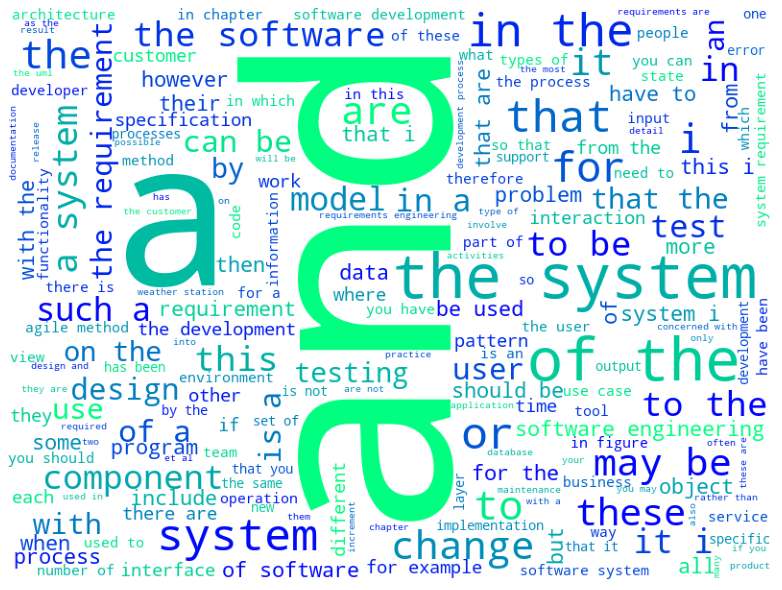

In [ ]:
# Word cloud without removing stopwords
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(cleantext) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

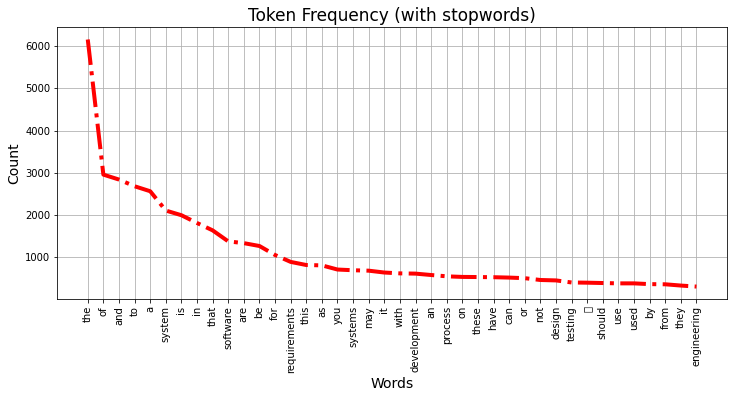

In [ ]:
tokens = word_tokenize(cleantext)
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:40]
y = list(freq.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (with stopwords)',size=17)
plt.xlabel('Words',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [ ]:
tokens = word_tokenize(cleantext)
tokens[:]  

['part',
 '1',
 'introduction',
 'to',
 'software',
 'engineeringmy',
 'aim',
 'in',
 'this',
 'part',
 'of',
 'the',
 'book',
 'is',
 'to',
 'provide',
 'a',
 'general',
 'introduction',
 'tosoftware',
 'engineering',
 'i',
 'introduce',
 'important',
 'concepts',
 'such',
 'as',
 'softwareprocesses',
 'and',
 'agile',
 'methods',
 'and',
 'describe',
 'essential',
 'software',
 'developmentactivities',
 'from',
 'initial',
 'software',
 'specification',
 'through',
 'to',
 'system',
 'evolutionthe',
 'chapters',
 'in',
 'this',
 'part',
 'have',
 'been',
 'designed',
 'to',
 'support',
 'a',
 'onesemestercourse',
 'in',
 'software',
 'engineering',
 'chapter',
 '1',
 'is',
 'a',
 'general',
 'introduction',
 'that',
 'introduces',
 'professional',
 'software',
 'engineering',
 'and',
 'defines',
 'some',
 'software',
 'engineering',
 'concepts',
 'i',
 'have',
 'also',
 'written',
 'a',
 'brief',
 'discussion',
 'of',
 'ethical',
 'issues',
 'in',
 'software',
 'engineering',
 'i',
 

In [ ]:
type(tokens)

list

In [ ]:
len(tokens)

103205

#### Removing stopwords and tokenization

In [ ]:
# Removing stopwords and storing it into finaltext
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(cleantext)
tokens_final = [i for i in tokens if not i in stop_words] # tokenising with removing stopwords
finaltext = "  "
finaltext = finaltext.join(tokens_final)

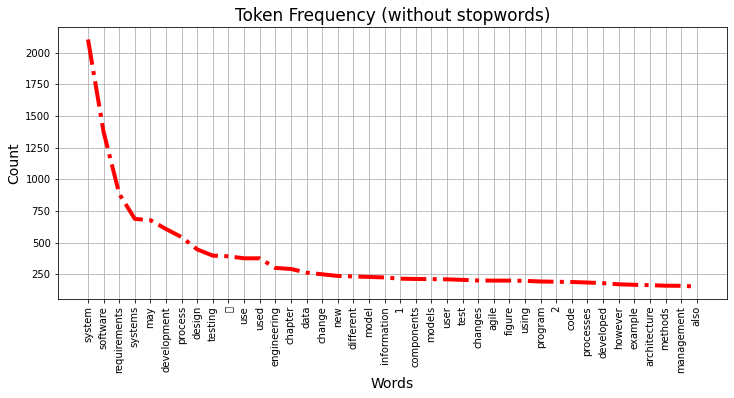

In [ ]:
tokens = word_tokenize(finaltext)
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:40]
y = list(freq.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (without stopwords)',size=17)
plt.xlabel('Words',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [ ]:
finaltext[:]

'part  1  introduction  software  engineeringmy  aim  part  book  provide  general  introduction  tosoftware  engineering  introduce  important  concepts  softwareprocesses  agile  methods  describe  essential  software  developmentactivities  initial  software  specification  system  evolutionthe  chapters  part  designed  support  onesemestercourse  software  engineering  chapter  1  general  introduction  introduces  professional  software  engineering  defines  software  engineering  concepts  also  written  brief  discussion  ethical  issues  software  engineering  think  important  software  engineers  think  wider  implications  work  chapter  also  introduces  three  case  studies  use  book  namely  system  managing  records  patients  undergoing  treatment  mental  health  problems  control  system  portable  insulin  pump  wilderness  weather  system  chapters  2  3  cover  software  engineering  processes  agile  devel  opment  chapter  2  introduce  commonly  used  generic

#### Visualization

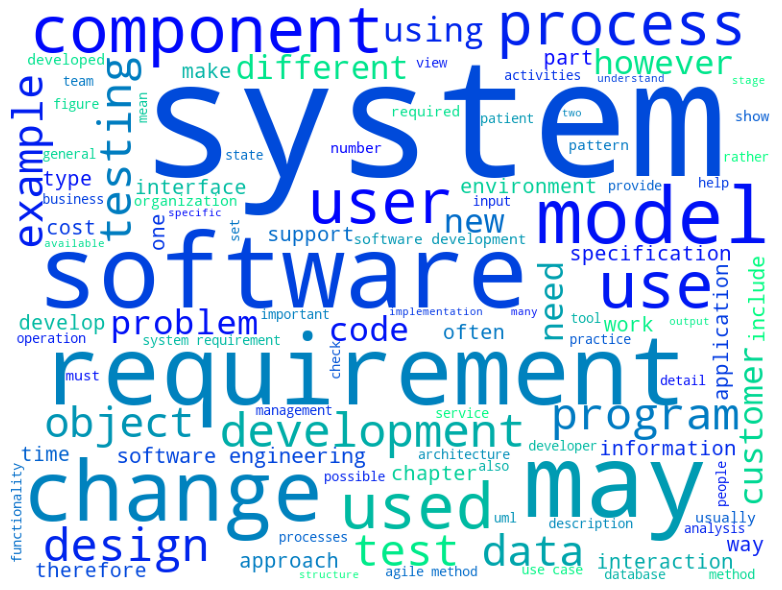

In [ ]:
# Word cloud after removing stopwords
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(finaltext) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

#### Frequency distribution of tokens

#### PoS Tagging and Frequency Distribution of Tags on Text

In [ ]:
tagged = nltk.pos_tag(tokens) 
tagged[:] # pos tagging

[('part', 'NN'),
 ('1', 'CD'),
 ('introduction', 'NN'),
 ('to', 'TO'),
 ('software', 'NN'),
 ('engineeringmy', 'JJ'),
 ('aim', 'NN'),
 ('in', 'IN'),
 ('this', 'DT'),
 ('part', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('book', 'NN'),
 ('is', 'VBZ'),
 ('to', 'TO'),
 ('provide', 'VB'),
 ('a', 'DT'),
 ('general', 'JJ'),
 ('introduction', 'NN'),
 ('tosoftware', 'NN'),
 ('engineering', 'NN'),
 ('i', 'NN'),
 ('introduce', 'VBP'),
 ('important', 'JJ'),
 ('concepts', 'NNS'),
 ('such', 'JJ'),
 ('as', 'IN'),
 ('softwareprocesses', 'NNS'),
 ('and', 'CC'),
 ('agile', 'JJ'),
 ('methods', 'NNS'),
 ('and', 'CC'),
 ('describe', 'VB'),
 ('essential', 'JJ'),
 ('software', 'NN'),
 ('developmentactivities', 'NNS'),
 ('from', 'IN'),
 ('initial', 'JJ'),
 ('software', 'NN'),
 ('specification', 'NN'),
 ('through', 'IN'),
 ('to', 'TO'),
 ('system', 'NN'),
 ('evolutionthe', 'JJ'),
 ('chapters', 'NNS'),
 ('in', 'IN'),
 ('this', 'DT'),
 ('part', 'NN'),
 ('have', 'VBP'),
 ('been', 'VBN'),
 ('designed', 'VBN'),
 ('to'

In [ ]:
type(tagged)

list

In [ ]:
from collections import Counter
counts = Counter( tag for word,  tag in tagged)
print(counts)

Counter({'NN': 23772, 'DT': 11588, 'IN': 11226, 'NNS': 9228, 'JJ': 8905, 'VB': 4587, 'VBZ': 3849, 'VBN': 3689, 'VBP': 3581, 'CC': 3532, 'RB': 3353, 'CD': 2701, 'TO': 2679, 'VBG': 2308, 'MD': 2021, 'PRP': 1888, 'WDT': 1060, 'WRB': 761, 'VBD': 528, 'PRP$': 521, 'JJR': 255, 'WP': 238, 'EX': 236, 'RBR': 166, 'RP': 140, 'NNP': 121, 'JJS': 96, 'RBS': 86, 'FW': 44, 'PDT': 29, 'WP$': 9, '$': 8})


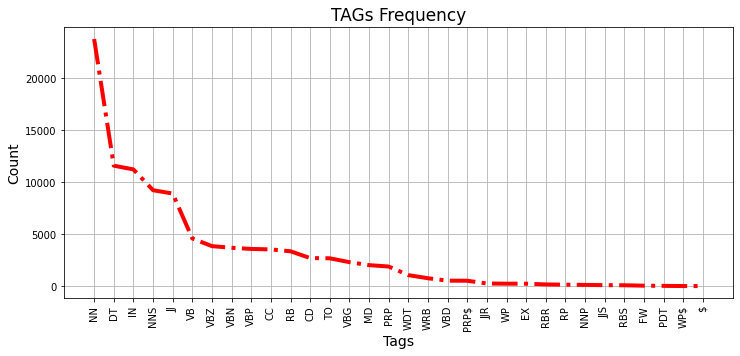

In [ ]:
freq_tags = nltk.FreqDist(counts)
freq_tags = {k: v for k, v in sorted(freq_tags.items(), key=lambda item: item[1],reverse=True)}
x = list(freq_tags.keys())[:40]
y = list(freq_tags.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('TAGs Frequency',size=17)
plt.xlabel('Tags',size=14)
plt.ylabel('Count',size=14)
plt.show()

#### For word length vs Frequency distribution

In [ ]:
import numpy as np
bin_size=np.linspace(0,16)

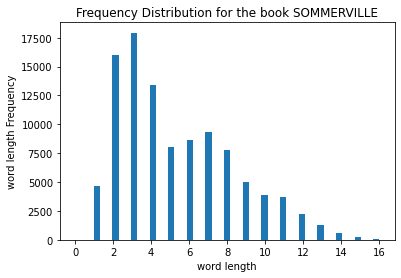

In [ ]:
#Finding Wordlength and storing it as a list
wordLength = [len(r) for r in tokens]

#Plotting histogram of Word length vs Frequency
plt.hist(wordLength, bins=bin_size)
plt.xlabel('word length')
plt.ylabel('word length Frequency')
plt.title('Frequency Distribution for the book SOMMERVILLE')
plt.show()
